PARTE 1: REGRESIÓN CON UNA VARIABLE

1. Importamos las librerias necesarias

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator,FormatStrFormatter


2. Extraemos los datos del csv y los guardamos en datos para facilitar su acceso. Donde X es la población e Y son los beneficios de la compañia.

In [ ]:
from pandas.io.parsers import read_csv
def lee_csv(filename):
    valores = read_csv(filename, header= None)
    valores.columns = ['X', 'Y']
    return valores
datos = lee_csv('C:/Users/carli_000/Desktop/ex1data1.csv')


3. Calculamos la hipotesis en función de teta0, teta1 y x

In [4]:
#hipotesis
def h(teta0, teta1, x):
    return teta0 + (teta1 * x)

4. Calculamos la función de coste en función de teta0, teta1  y los valores extraidos del csv. Para comprobar que el valor obtenido es el correcto damos valor a teta0 y teta1 donde teta0 = 0 y teta1 = 0.

In [8]:
#funcion de coste
def funcoste(teta0, teta1, valores):
    coste = sum(np.array(h(teta0, teta1, valores.X) - valores.Y)**2)
    return coste/(2 * len(valores))
funcoste(0,0,datos)


32.072733877455654

5. Realizamos el algoritmo del descenso de gradiendo para una variable. Obtenemos el valor de teta0 y teta1 tras realizarlo. También pintamos la gráfica donde podemos observar la distribución de la población en función de sus ingresos. También obtenemos la recta que mejor se ajusta a los puntos.

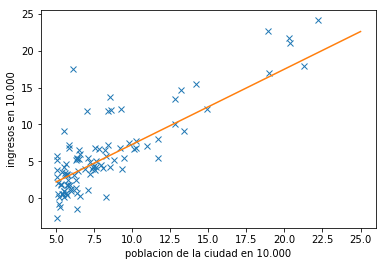

In [82]:
def gradientDescent(teta0, teta1, ite, alfa, valores):
    sum0 = 0
    sum1 = 0
    
    x = np.linspace(5, 22.5,8)
    y = np.linspace(5, 25, 8)
    coste = np.array([])
    #plt.plot(5,10,15,20)
    #plt.plot(x,y)
    plt.ylabel('ingresos en 10.000')
    plt.xlabel('poblacion de la ciudad en 10.000')
    
   
    for j in range(ite):
       
        sum0 = sum(h(teta0, teta1, valores.X) - valores.Y)
        sum1 = sum((h(teta0, teta1, valores.X) - valores.Y) * valores.X)
            
        tmp0 = teta0 - alfa  * sum0/len(valores)
        tmp1 = teta1 - alfa * sum1/len(valores)
        
        teta0 = tmp0
        teta1 = tmp1
        
    coste = np.append(coste, h(teta0, teta1, valores.X)) 
    plt.plot(valores.X, valores.Y, 'x')
    plt.plot(y,h(teta0,teta1,x))
        
    return teta0,teta1
    
#prueba

teta0,teta1 = gradientDescent(0, 0, 1500, 0.01, datos)



6. Para poder observar la función de coste pintamos la siguiente gráfica en 3D. En los intervalos [-10,10] y [-1,4].

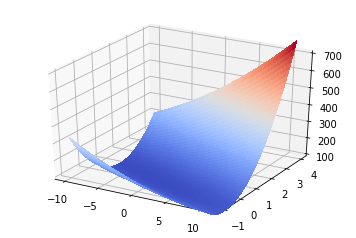

In [75]:
#3d
def surface(valores):
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    X = np.linspace(-10,11)
    Y = np.linspace(-1, 4)
    X,Y = np.meshgrid(X,Y)

    Z = np.array([funcoste(teta0, teta1, datos) for teta0, teta1 in zip(np.ravel(X), np.ravel(Y))])
    Z = np.reshape(Z, X.shape)
    surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
    ax.set_zlim(100, 700)
    return X,Y,Z
aux= surface(datos)

7. También hacemos uso de la función contour para poder observar el mínimo obtenido en el descenso de gradiente.

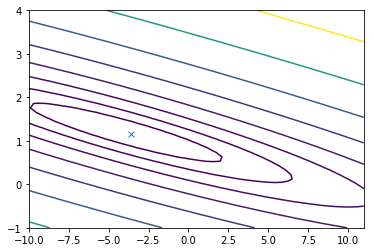

In [83]:
#contour
x_aux = aux[0]
y_aux = aux[1]
z_aux = aux[2]
def contorno(X,Y,Z):
    plt.contour(X, Y, Z, np.logspace(-2, 3, 20))
    plt.plot(teta0,teta1,'x')
    
contorno(x_aux, y_aux, z_aux)

PARTE 2: REGRESION CON VARIAS VARIABLES

1. Importamos las bibliotecas necesarias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator,FormatStrFormatter


2. Se extraen los datos del csv proporcionado por el profesores y los guardamos en datos para facilitar su acceso

In [58]:
from pandas.io.parsers import read_csv
def lee_csv(filename):
    valores = read_csv(filename, header= None)
    valores.columns = ['X', 'Y', 'Z']
    
    return valores
datos = lee_csv('C:/Users/carli_000/Desktop/ex1data2.csv')
m = len(datos.Z)



3. Normalizamos el valor de las columnas de tamaño y numero de habitaciones de cada casa. En nuestro caso almacenamos en matrizDatos ambas columnas para normalizarlas. Obtenemos también los valores de mu y sigma

In [48]:
#normalizar
#devuelve una matriz con los datos normalizados
def normaliza(valores):
    numDatos = len(valores)
    #No devolvia lo que se pedia pero lo he comentado por si acaso
    #matrizDatos = np.array([])
    #matrizDatos =  np.append(matrizDatos,valores.loc[:, 'X':'Y'])
    matrizDatos = valores.iloc [:, 0: 2]
    #print(matrizDatos)
    #la media
    mu = np.mean(matrizDatos)
    #La desviacion
    sigma = np.std(matrizDatos)
    X_norm = (matrizDatos - mu)/sigma
    return X_norm, sigma, mu

normaliza(datos)
X = normaliza(datos)[0]
sigma = normaliza(datos)[1]
mu = normaliza(datos)[2]


4. Realizamos la función de coste en el que en X (contiene la columna de tamaño y número de habitaciones) adjuntamos una columna de 1's.

In [50]:
#funcionDeCoste
#X = datos.loc[:, 'X':'Y']
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 1500
theta = np.zeros((3,1))
Z = datos.Z
Z = Z[:,np.newaxis]

def coste(X, Z, theta):
    temp = np.dot(X, theta) - Z
    return (np.dot(np.transpose(temp),temp))/(2*m)

J = coste(X, Z, theta)
print(J)
    

[[6.55915481e+10]]


5. Obtenemos de forma vectorizada los 3 valores de theta y los guardamos en theta


In [56]:
#descendent gradient

def gradientDescendent(X, Z, theta, alpha, itera):
    array_coste = np.array([])
    it = np.array([])
    for i in range(itera):
        #print(theta)
        temp1 = np.dot(X, theta) - Z
        #print(temp1)
        aux = temp1
        temp1 = np.dot(np.transpose(X), aux)
        #print(temp1)
        theta = theta - np.dot((alpha/m), temp1)
        array_coste = np.append(array_coste,coste(X,Z, theta))
        
    #Para pintar la gráfica para ver la comparación de la función de coste
    #en función de el número de iteraciones
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Función de coste')
    plt.plot(range(itera), array_coste)
    plt.legend(('alfa = 0.3', 'alfa = 0.1', 'alfa = 0.01','alfa = 0.001'))
    return theta
theta = gradientDescendent(X, Z, np.zeros((3,1)), alpha, num_iters)
print(theta)

[[340412.56301439]
 [109370.05670466]
 [ -6500.61509507]]


6. Pintamos la gráfica en la que el eje X es el número de iteracion e Y es la función de coste en función del número de iteraciones. Guardamos en D1, D2, D3, D4 los valores de vamos obteniendo de teta para los diferentes valores de alfa.

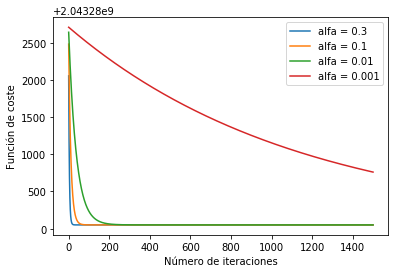

In [12]:
#Grafica en funcion el coste y el numero de iteraciones
D1 = gradientDescendent(X,Z,theta,0.3,num_iters)
D2 = gradientDescendent(X,Z,theta,0.1,num_iters)
D3 = gradientDescendent(X,Z,theta,0.03,num_iters)
D4 = gradientDescendent(X,Z,theta,0.001,num_iters)


Vemos que las funciones representadas decrecen más rapido a mayor valor de alfa. Es decir, la función de coste disminuye.

7. Por último, calculamos los valores de theta sin normalizar la X. 

In [54]:
#decenso de gradiente ecuacion normal
def ecuacionNormal(datos):
    X = datos.iloc [:, 0: 2]
    ones = np.ones((m,1))
    X = np.hstack((ones, X))
    inversa = np.linalg.pinv(np.dot(X.transpose(),X))
    return np.dot(np.dot(inversa,X.transpose()),Z)
thetaSN = ecuacionNormal(datos)

8. Para comprobar que los resultados son los correctos comparamos el precio obtenido para una casa de 1650 pies cuadrados y 3 habitaciones con los valores de theta obtenidos en el descenso de gradiente y con los de la ecuacion normal donde X no esta normalizada.

In [57]:
#Comprobación
def comprobacion():
    normalizada = theta[0] + (theta[1] * ((1650 -2000.7)/794.70)
                    + theta[2]* ((3-3.1702)/0.76098))
    
    sinNormalizar = thetaSN[0] + thetaSN[1] * 1650 + thetaSN[2]* 3
    return 'valor con normalización:', normalizada , 'sin normalizar:', sinNormalizar
comprobacion()


('valor con normalización:',
 array([293601.63060462]),
 'sin normalizar:',
 array([293081.46433499]))

Observamos que los dos valores obtenidos son muy semejantes.